In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scienceplots

plt.style.use(['science', 'nature', 'no-latex'])

In [14]:
grouped_df = pd.read_csv("./Data/Fig2_b_res_All.csv", index_col=0)
grouped_df_cmt = pd.read_csv("./Data/Fig2_b_res_Commented.csv", index_col=0)

In [15]:
grouped_df.loc["total"] =grouped_df.sum(axis=0).tolist()
grouped_df = grouped_df.loc[['total', '<=10', '11-20', '21-50', '51-100', '>100']]
grouped_df_cmt.loc["total"] =grouped_df_cmt.sum(axis=0).tolist()
grouped_df_cmt = grouped_df_cmt.loc[['total', '<=10', '11-20', '21-50', '51-100', '>100']]

In [17]:
df1_percentage = grouped_df.div(grouped_df["sum"], axis=0) * 100
df2_percentage = grouped_df_cmt.div(grouped_df_cmt["sum"], axis=0) * 100

In [18]:
colors = ['#0C5DA5','#de425b', '#FF9500', '#cccccc', '#f1f1f1']

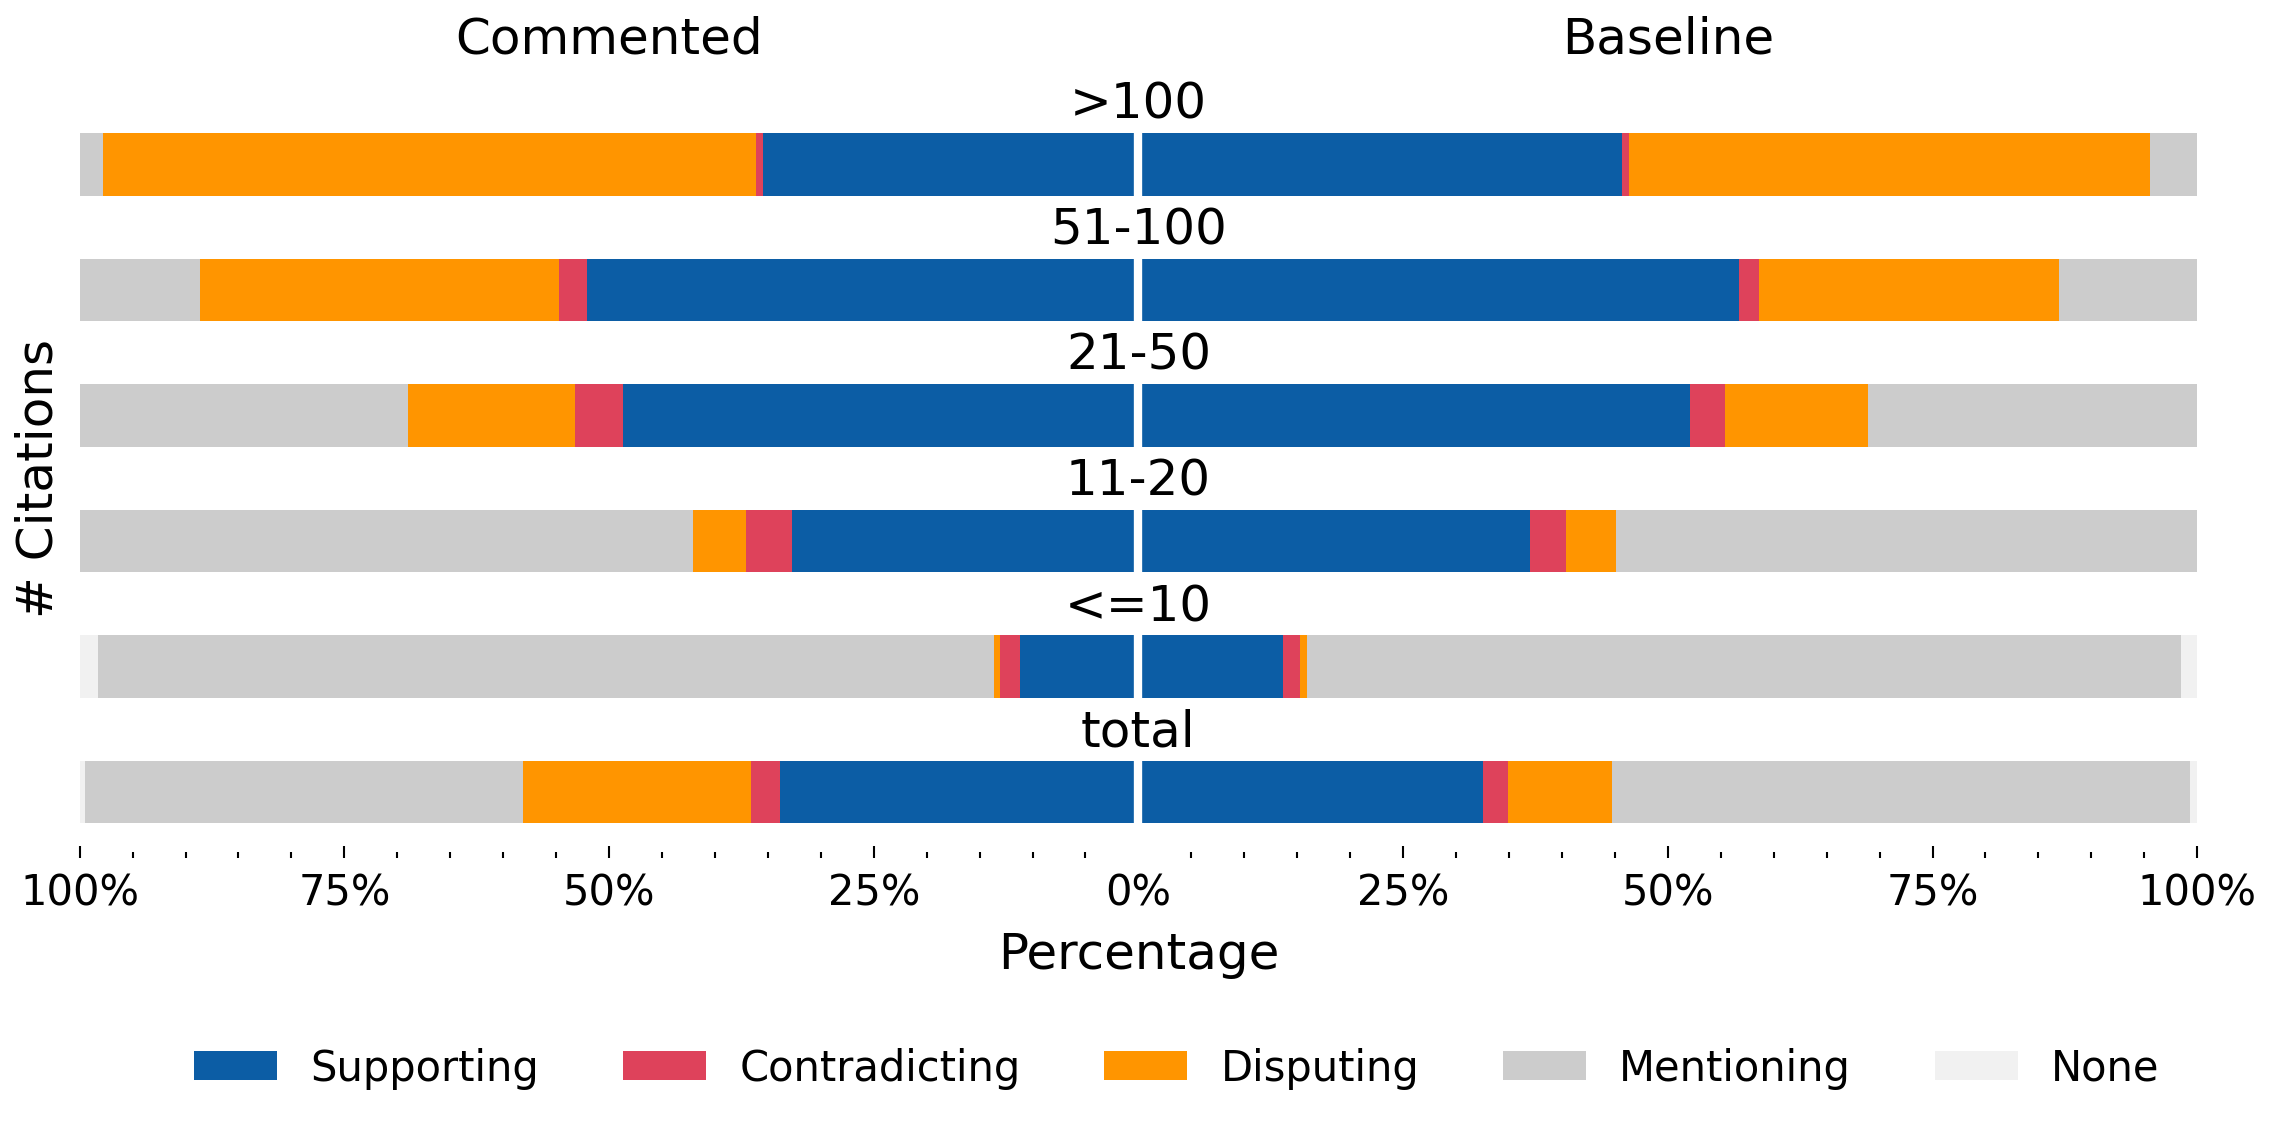

In [57]:
x = list(range(len(grouped_df)))
width = 0.5

fig, ax = plt.subplots(figsize=(8,4), dpi=300)

# 绘制第一组DataFrame的堆积图
rects1 = ax.barh(x, df1_percentage["Supporting"], width, label='Supporting', color=colors[0])
rects2 = ax.barh(x, df1_percentage["Contradicting"], width, left=df1_percentage["Supporting"], label='Contradicting', color=colors[1])
rects3 = ax.barh(x, df1_percentage["Disputing"], width, left=df1_percentage["Supporting"] + df1_percentage["Contradicting"], label='Disputing', color=colors[2])
rects4 = ax.barh(x, df1_percentage["Mentioning"], width, left=df1_percentage["Supporting"] + df1_percentage["Contradicting"] + df1_percentage["Disputing"], label='Mentioning', color=colors[3])
rects5 = ax.barh(x, df1_percentage["None"], width, left=df1_percentage["sum"] - df1_percentage["None"], label='None', color=colors[4])

# 绘制第二组DataFrame的堆积图
rects6 = ax.barh(x, -df2_percentage["Supporting"], width, label='Supporting', color=colors[0])
rects7 = ax.barh(x, -df2_percentage["Contradicting"], width, left=-df2_percentage["Supporting"], label='Contradicting', color=colors[1])
rects8 = ax.barh(x, -df2_percentage["Disputing"], width, left=-df2_percentage["Supporting"] - df2_percentage["Contradicting"], label='Disputing', color=colors[2])
rects9 = ax.barh(x, -df2_percentage["Mentioning"], width, left=-df2_percentage["Supporting"] - df2_percentage["Contradicting"] - df2_percentage["Disputing"], label='Mentioning', color=colors[3])
rects10 = ax.barh(x, -df2_percentage["None"], width, left=-df2_percentage["sum"] + df2_percentage["None"], label='None', color=colors[4])

# 设置图形属性
ax.set_xlabel('Percentage', fontsize=12)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], bbox_to_anchor=(1, -0.2), fontsize=10, ncols=5)


# 隐藏y轴的刻度线，只显示刻度标签，并将刻度标签放在x=0处居中显示
ax.set_yticks([])
for i, label in enumerate(grouped_df.index):
    ax.text(0, i+0.95*width, label, ha='center', va='center', size=12)
    ax.axvline(x=0, ymin=i, ymax=i+1, color='white', linestyle='-', linewidth=2)  

# 分区
ax.text(-50, 6, "Commented", ha='center', va='center', fontsize=12)
ax.text(50, 6, "Baseline", ha='center', va='center', fontsize=12)


# 隐藏图表的边框线
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# 设置x轴的刻度范围和标签
ax.xaxis.tick_bottom()
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(-100, 100)
ax.set_xticks([-100, -75, -50, -25, 0, 25, 50, 75, 100])
ax.set_xticklabels(['100%', '75%', '50%', '25%', '0%', '25%', '50%', '75%', '100%'], size=10)


plt.ylabel("# Citations", fontsize=12)
plt.tight_layout()
plt.show()